# Text Mining with Word Embedding

Objective:



1.   Understand the concept of word embeddings and their role in text mining.

2.   Implement word embeddings using popular Python libraries.

3.   Apply word embeddings to a text mining task.


Task 1: Setting Up the Environment

1.Install the required libraries:

In [ ]:
pip install nltk gensim scikit-learn pandas matplotlib


2. Import the necessary modules:

In [ ]:
import nltk
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

Task 2: Data Preprocessing

1. Load the text data:

In [ ]:
# Sample text data
text_data = [
    "Natural language processing is a branch of artificial intelligence.",
    "Word embeddings are a type of word representation.",
    "Text mining involves extracting meaningful information from text.",
    "Machine learning algorithms are used for text classification."
]

2. Tokenize the text data:

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokenized_data = [word_tokenize(sentence.lower()) for sentence in text_data]
print(tokenized_data)

[['natural', 'language', 'processing', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence', '.'], ['word', 'embeddings', 'are', 'a', 'type', 'of', 'word', 'representation', '.'], ['text', 'mining', 'involves', 'extracting', 'meaningful', 'information', 'from', 'text', '.'], ['machine', 'learning', 'algorithms', 'are', 'used', 'for', 'text', 'classification', '.']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Task 3: Training Word Embeddings

1. Train a Word2Vec model:

In [ ]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

2. Explore the Word2Vec model:

In [ ]:
# Get the vocabulary
vocab = list(model.wv.index_to_key)
print(vocab)

# Get the vector for a specific word
word_vector = model.wv['word']
print(word_vector)

['.', 'text', 'are', 'a', 'of', 'word', 'classification', 'language', 'processing', 'is', 'branch', 'artificial', 'intelligence', 'embeddings', 'type', 'for', 'representation', 'mining', 'involves', 'extracting', 'meaningful', 'information', 'from', 'machine', 'learning', 'algorithms', 'used', 'natural']
[-8.7274825e-03  2.1301615e-03 -8.7354420e-04 -9.3190884e-03
 -9.4281426e-03 -1.4107180e-03  4.4324086e-03  3.7040710e-03
 -6.4986930e-03 -6.8730675e-03 -4.9994122e-03 -2.2868442e-03
 -7.2502876e-03 -9.6033178e-03 -2.7436293e-03 -8.3628409e-03
 -6.0388758e-03 -5.6709289e-03 -2.3441375e-03 -1.7069972e-03
 -8.9569986e-03 -7.3519943e-04  8.1525063e-03  7.6904297e-03
 -7.2061159e-03 -3.6668312e-03  3.1185520e-03 -9.5707225e-03
  1.4764392e-03  6.5244664e-03  5.7464195e-03 -8.7630618e-03
 -4.5171441e-03 -8.1401607e-03  4.5956374e-05  9.2636338e-03
  5.9733056e-03  5.0673080e-03  5.0610625e-03 -3.2429171e-03
  9.5521836e-03 -7.3564244e-03 -7.2703874e-03 -2.2653891e-03
 -7.7856064e-04 -3.2161

Task 4: Visualizing Word Embeddings

1. Reduce dimensions using PCA:

In [ ]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

2. Plot the word vectors:

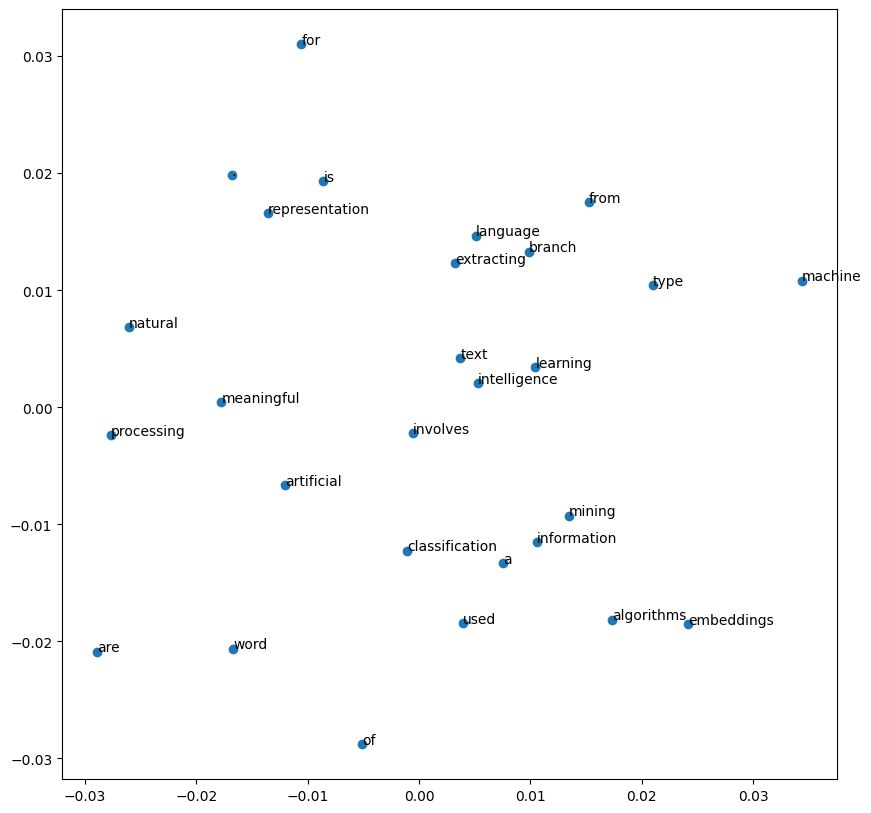

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

Task 5: Applying Word Embeddings to a Text Mining Task

1. Load a sample dataset:

In [ ]:
# Sample dataset with text and labels
import numpy as np
data = {
    'text': [
        "I love programming in Python",
        "Natural language processing is fascinating",
        "Machine learning is transforming industries",
        "Python is great for data science"
    ],
    'label': [1, 1, 0, 0]
}
df = pd.DataFrame(data)

2. Preprocess the text data:

In [ ]:
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

3. Convert text data to vectors:

In [ ]:
def get_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['vector'] = df['tokenized_text'].apply(lambda x: get_vector(x, model))

4. Train a simple classifier:

In [ ]:
X = np.array(df['vector'].tolist())
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.0


Why were we experiencing zero accuracy?
1. Small Dataset: The sample dataset is very small, which may lead to poor performance. For meaningful results, you should use a larger dataset.
2. Model Parameters: Fine-tuning Word2Vec parameters might help.
3. Balanced Data: Ensure that your data is balanced between classes.


Problem 1: Try Word2Vec processing with classifier on a large dataset.

Problem 2: Implement GloVe embeddings and compare the results with word2vec.

Problem 3: Implement BERT on the IMDb dataset and compare its performance with the methods mentioned above.